In [3]:
using DiffEqBase, OrdinaryDiffEq,
      Sundials, Plots, ODEInterface, ODEInterfaceDiffEq,
      LSODA, ModelingToolkit, DiffEqDevTools
include("potentials/inversepower.jl")
include("minimumassign/minimumassign.jl")
include("utils/utils.jl")

generate_random_coordinates (generic function with 1 method)

In [4]:
natoms = 16
radii_arr = generate_radii(0, natoms, 1.,1.4, 0.05, 0.05*1.4)
dim = 2.0
phi = 0.9
power = 2.5
eps = 1

length = get_box_length(radii_arr, phi, dim)



volume = length^3
println(volume)
println 



potential = InversePowerPeriodic(2, power, eps, [length, length],  radii_arr)




coords = generate_random_coordinates(length, natoms, dim)




tol = 1e-4


odefunc = gradient_problem_function_all!(potential)
tspan = (0, 100.)

764.3624272441962
32.0


(0, 100.0)

In [5]:
prob = ODEProblem(odefunc, coords, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: 32-element Vector{Float64}:
 5.26547250894492
 7.938874364818388
 8.8488166077642
 7.019171417218076
 4.290953061383954
 0.5702411025692091
 3.228738571851173
 7.018362820827343
 0.3944484188752373
 2.4502458959085827
 0.6111925985564105
 1.4321652375868488
 5.534368996139129
 ⋮
 7.33217401704462
 0.3231634405273944
 4.431363975462053
 8.22158712979583
 8.701529612544768
 7.324813082841852
 1.1367116491304365
 1.0447858894419346
 0.7273850491669233
 7.101313208494044
 0.9584178814432026
 7.66271463627935

In [6]:
@time sol = solve(prob, CVODE_BDF(), abstol=1/10^12, reltol=1/10^12)

  7.136683 seconds (33.02 M allocations: 2.445 GiB, 5.15% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 2227-element Vector{Float64}:
   0.0
   3.1811387991412514e-6
   6.362277598282503e-6
   1.5043463670122203e-5
   2.3724649741961906e-5
   3.2405835813801605e-5
   4.1087021885641304e-5
   5.856441993444259e-5
   8.988602254772947e-5
   0.00014498576053916483
   0.00024192859546362842
   0.0004207959908698465
   0.0008197004645096495
   ⋮
  97.31086799992623
  97.57697946087497
  97.8430909218237
  98.10920238277244
  98.37531384372117
  98.64142530466991
  98.90753676561864
  99.17364822656738
  99.43975968751612
  99.70587114846485
  99.97198260941359
 100.0
u: 2227-element Vector{Vector{Float64}}:
 [5.26547250894492, 7.938874364818388, 8.8488166077642, 7.019171417218076, 4.290953061383954, 0.5702411025692091, 3.228738571851173, 7.018362820827343, 0.3944484188752373, 2.4502458959085827  …  4.431363975462053, 8.22158712979583, 8.701529612544768, 7.324813082841852, 1.1367116491304365, 1.0447858894419346, 0.7273850491669233, 7.1013132

In [14]:
BLAS.set_num_threads(1)
abstols = 1.0 ./ 10.0 .^ (5:8)
reltols = 1.0 ./ 10.0 .^ (5:8);
setups = [
          Dict(:alg=>Rosenbrock23(autodiff=false)),
          Dict(:alg=>TRBDF2(autodiff=false)),
          Dict(:alg=>QNDF(autodiff=false)),
          #Dict(:alg=>rodas()),
          Dict(:alg=>CVODE_BDF()),
          #Dict(:alg=>Rodas4(autodiff=false)),
          #Dict(:alg=>Rodas5(autodiff=false)),
          Dict(:alg=>KenCarp4(autodiff=false)),
          Dict(:alg=>KenCarp47(autodiff=false)),
          #Dict(:alg=>RadauIIA5(autodiff=false)),
          #Dict(:alg=>lsoda()),
          ]

6-element Vector{Dict{Symbol, V} where V}:
 Dict{Symbol, Rosenbrock23{0, false, DefaultLinSolve, DataType}}(:alg => Rosenbrock23{0, false, DefaultLinSolve, DataType}(DefaultLinSolve(nothing, nothing), Val{:forward}))
 Dict{Symbol, TRBDF2{0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType}}(:alg => TRBDF2{0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType}(DefaultLinSolve(nothing, nothing), NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}(1//100, 10, 1//5, 1//5), Val{:forward}, true, :linear, :PI))
 Dict{Symbol, QNDF{5, 0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType, Nothing, Nothing, NTuple{5, Float64}}}(:alg => QNDF{5, 0, false, DefaultLinSolve, NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}}, DataType, Nothing, Nothing, NTuple{5, Float64}}(Val{5}(), DefaultLinSolve(nothing, nothing), NLNewton{Rational{Int64}, Rational{Int

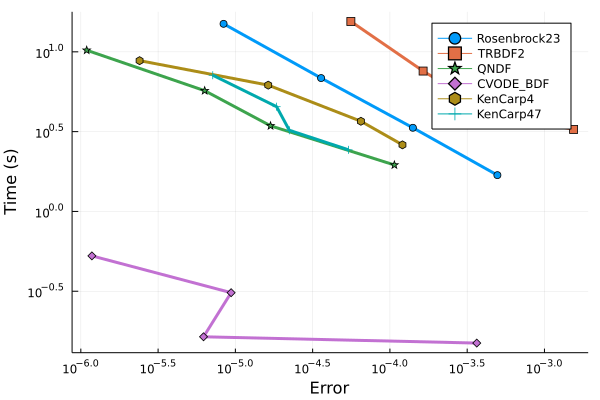

In [15]:
wp2 = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      appxsol=sol,maxiters=Int(1e5),numruns=1)
plot(wp2)

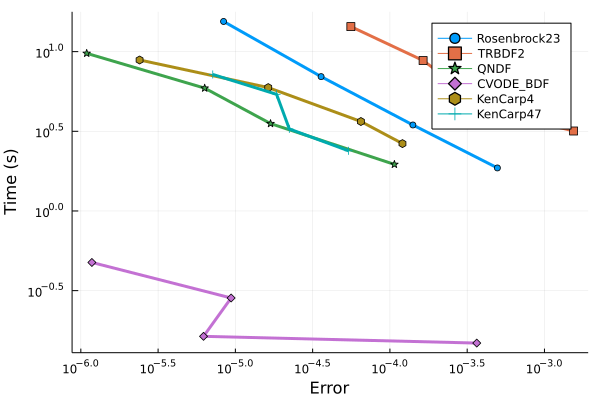

In [11]:
plot(wp2, fmt=:png)

In [12]:
print(coords)

[5.26547250894492, 7.938874364818388, 8.8488166077642, 7.019171417218076, 4.290953061383954, 0.5702411025692091, 3.228738571851173, 7.018362820827343, 0.3944484188752373, 2.4502458959085827, 0.6111925985564105, 1.4321652375868488, 5.534368996139129, 1.2411440977435457, 7.6631057250472505, 8.363424965543553, 2.7436551939555747, 6.60918361882509, 1.0940112754127833, 7.01349620997795, 7.33217401704462, 0.3231634405273944, 4.431363975462053, 8.22158712979583, 8.701529612544768, 7.324813082841852, 1.1367116491304365, 1.0447858894419346, 0.7273850491669233, 7.101313208494044, 0.9584178814432026, 7.66271463627935]

In [ ]:
print(length)

In [13]:
print(radii_arr)

[1.0339553713017888, 1.0414206741450018, 0.9823496299849702, 0.9932573064034739, 1.0293308537316554, 1.0148667925424708, 1.003247377427417, 0.9945491307459141, 1.3640052726416674, 1.510203114149589, 1.3517765010522012, 1.3466037328512679, 1.4278237686452713, 1.456814073575481, 1.375755177700484, 1.3868699122638386]

In [ ]:
BLAS.set_num_threads(2)
wp = WorkPrecisionSet(prob2,abstols,reltols,setups;error_estimate=:l2,
                      appxsol=sol,maxiters=Int(1e5),numruns=1)
plot(wp)